# EWRI-WDSA Webinar : *building the smarter stormwater systems using pyswmm*

## 🎯 objective 🎯
This tutorial introduces pyswmm and its eco-system of libraries for modeling stormwater systems in python. It will also showcase how pyswmm enables the integration of epa-swmm with python's scientific programming stack to unlock new analytical capabilities.

## about me

data scientist at xylem

### research intrests:
    - timeseries prediction and anamoly detection
    - real-time control of water infrastructure 
    - wireless sensor networks for environmental monitoring 
    - open-source software 
### backgrouund
    - phd in civil engineering specializing in intelligent infrastructure systems from university of michigan, ann arbor. You can read about my work/research in [randomstorms.net](https://randomstorms.net).

## table of contents 

1. simulating stormwater systems in pyswmm
2. what makes pyswmm special?
3. pyswmm eco-system overview
4. real-time control: pystorms
5. water quality modeling: stormreactor
6. i/o: swmmio and swmm-pandas
7. 🧙🏼‍♂️ optimization
8. intresting research

before we move on, let us install the packages

In [ ]:
pip install pyswmm pandas matplotlib pystorms

## Introduction: What is pyswmm

[pyswmm](https://www.pyswmm.org): pyswmm is a Python wrapper for controlling EPA-SWMM's simulation engine. pyswmm is available in PyPI and on GitHub. pyswmm enables us to pause the simulation, query the states, make the necessary modification, and resume the simulation. 

1. Configure and run 100s scenarios
2. Develop a modular apporach for stormwater modeling
3. Develop stormwater control approaches
4. Build machine learning based solutions for modeling stormwater solutions

credits: https://www.pyswmm.org/who

In [5]:
import pyswmm
import pystorms
import pandas as pd
import matplotlib.pyplot as plt

# RC parms for pretty plots 💁🏽
plt.rcParams.update({'font.size': 14})
plt.style.use('seaborn-v0_8-whitegrid')

pystorms is a collection of stormwater networks for anlyzing the performance of stormwater networks.

In [6]:
network = pystorms.networks.load_network("gamma")

In [7]:
time = []
flow = []
depth = []

with pyswmm.Simulation(network) as sim:
    link = pyswmm.Links(sim)['O1']
    node = pyswmm.Nodes(sim)['1']
    
    for step in sim:
        time.append(sim.current_time)
        depth.append(node.depth)
        flow.append(link.flow)

data = pd.DataFrame(data={"depth": depth, "flow": flow}, index=time)

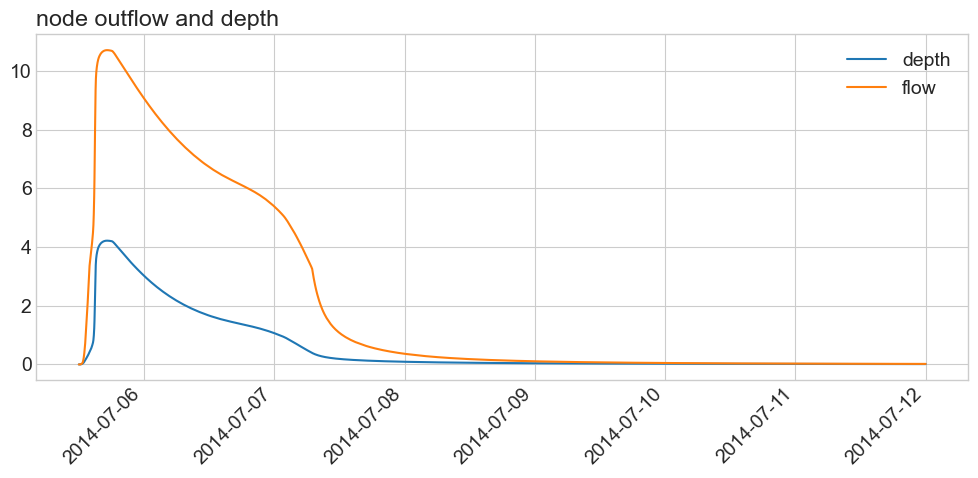

In [8]:
fig = plt.figure(figsize=(10, 5), tight_layout=True)
ax = fig.gca()
data.plot(ax=ax)
ax.set_title("node outflow and depth", loc='left')
ax.tick_params(axis='x', labelrotation=45)
ax.legend()

In [22]:
import swmmio
model = swmmio.Model(network)

In [24]:
nodes = model.nodes.dataframe
links = model.links.dataframe

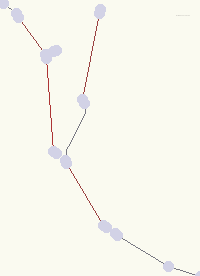

In [45]:
# style the links and nodes a bit
nodes['draw_size'] = 5
links['draw_size'] = 1 
swmmio.draw_model(nodes=nodes, conduits=links, px_width=100)

In [46]:
# Load the input file
input_file = pystorms.networks.load_network("theta")

depth = []
flow = []
simulation_time = []
with pyswmm.Simulation(inputfile=input_file) as sim:
    # Initialize nodes and links objects
    nodes = pyswmm.Nodes(sim)
    link = pyswmm.Links(sim)
    
    # Specify the link or nodes that we are interested in monitoring
    node_P1 = nodes['P1']
    link_8 = link['8']
    orifice_P1 = link['1']
    # Progress through the simulation
    for step in sim:
        # Log the simulation time
        simulation_time.append(sim.current_time)
        
        basin_P1_depth = node_P1.depth
        
        # A simple control action to hold the water in the basin
        if basin_P1_depth <= 0.10:
            orifice_P1.target_setting = 0.0
        else:
            orifice_P1.target_setting = 1.0
        
        # Log basin depth and flow
        depth.append(basin_P1_depth)
        flow.append(link_8.flow)

Text(0.5, 0, 'Simulation Time')

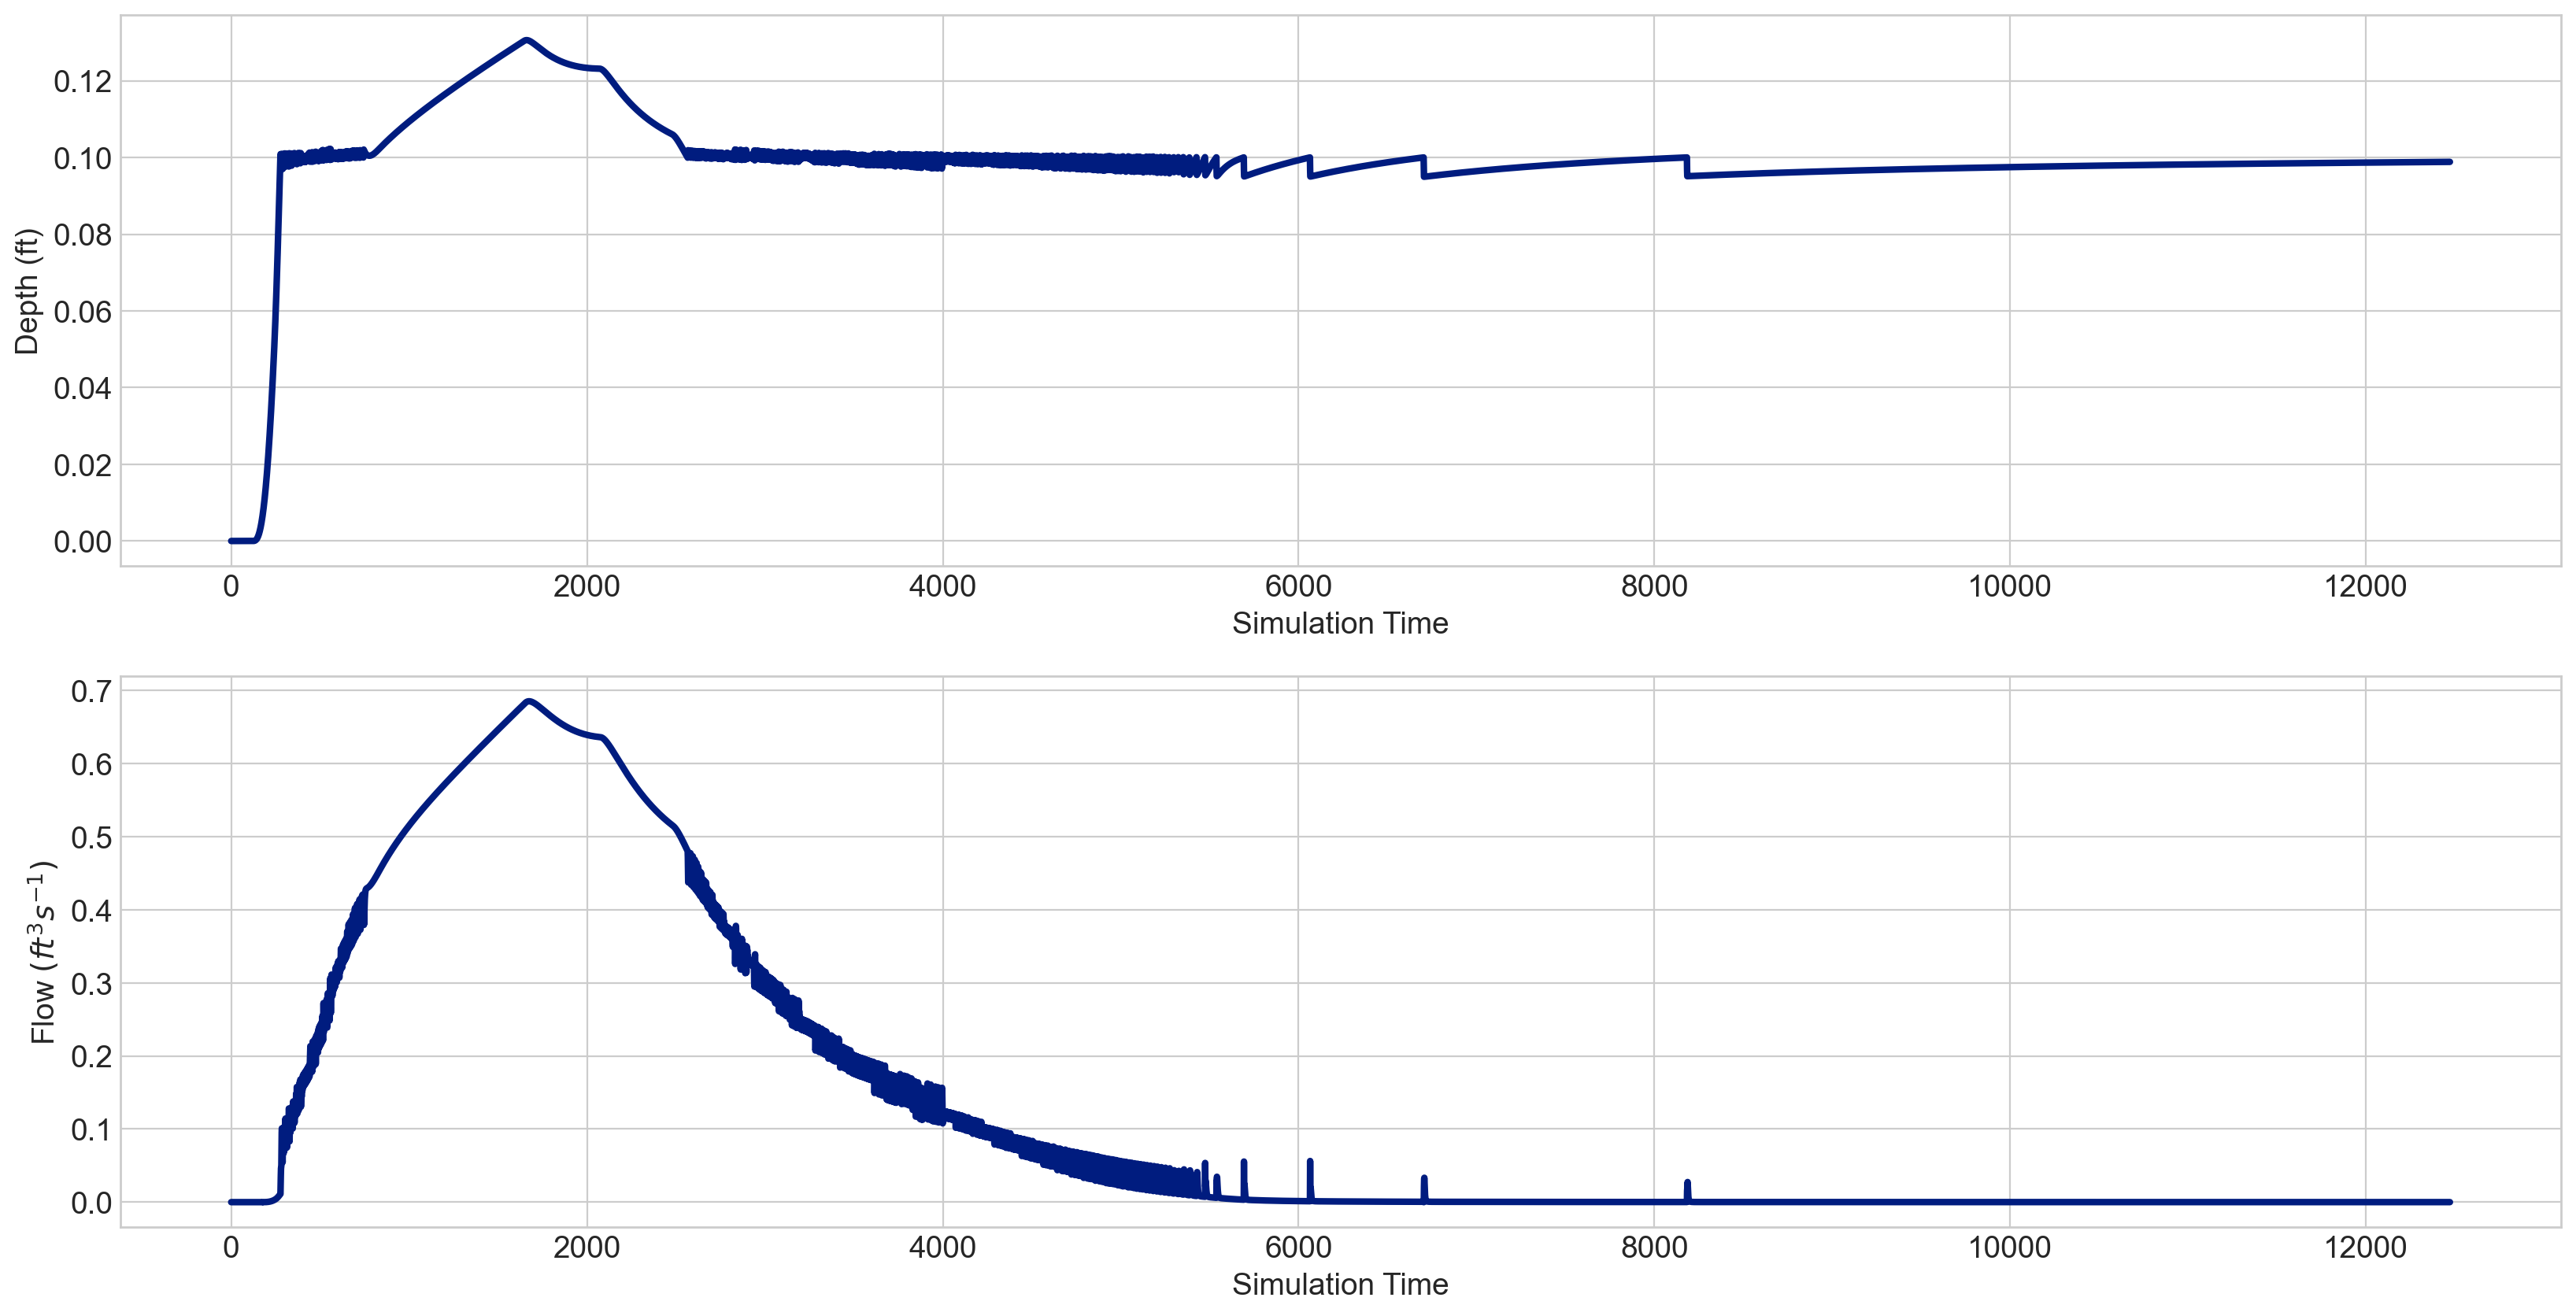

In [47]:
plt.figure(figsize=(20, 10), dpi=200)
plt.subplot(2, 1, 1)
plt.plot(depth, linewidth=3.0)
plt.ylabel("Depth (ft)")
plt.xlabel("Simulation Time")

plt.subplot(2, 1, 2)
plt.plot(flow, linewidth=3.0)
plt.ylabel(r"Flow $(ft^{3}s^{-1})$")
plt.xlabel("Simulation Time")

stormreactor: https://github.com/kLabUM/StormReactor